In [13]:
# In this notebook I am going to create a statistal analysis from a whatsapp chat with my girlfriend Eva to see how many messages we send each other and how many words we use in each message.
# Also, I am going to create a word cloud to see which words we use the most.
# Moreover, I am going to create a time series to see how many messages we send each day and at what time we send them.
# Furthermore, I am going to create a sentiment analysis to see if we are happy or sad when we send messages to each other.
# I want to create a word cloud with the most used words in the chat, and see a battle of who said most times "I love you" to the other.
# This will be a data story for a gift to her for her birthday. I hope she likes it.


#### Preprocessing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import re


In [2]:
# remove unicode control characters from file and save it to a new file with suffix _unicode_removed
with open('Eva_chat_10_03_2024.txt', 'r', encoding='utf-8') as file:
    lines = file.readlines()
    lines = [line.encode('ascii', 'ignore').decode('ascii') for line in lines]
    with open('Eva_chat_10_03_2024_unicode_removed.txt', 'w', encoding='utf-8') as file:
        file.writelines(lines)

In [3]:


# Regular expression pattern to match date, time, user, and text
pattern = r'\[(\d+/\d+/\d+), (\d+:\d+:\d+)\] (\w+): (.+)'

# Function to parse each line and extract information
def parse_line(line):
    match = re.match(pattern, line)
    if match:
        date = match.group(1)
        time = match.group(2)
        user = match.group(3)
        text = match.group(4)
        return date, time, user, text
    else:
        return None

# Read lines from the file and parse them
with open('Eva_chat_10_03_2024_unicode_removed.txt', 'r', encoding='utf-8') as file:
    lines = file.readlines()
    data = [parse_line(line) for line in lines]

# Create DataFrame from the parsed data
df = pd.DataFrame(data, columns=['Date', 'Time', 'User', 'Text'])

# Drop rows where parsing failed
df = df.dropna()

# # Merge text with the previous line if it starts with a whitespace
# for i in range(len(df)-1, 0, -1):
#     if df.iloc[i]['Text'][0].isspace():
#         df.at[i-1, 'Text'] += ' ' + df.at[i, 'Text']
#         df.drop(i, inplace=True)

# Reset index after dropping rows
df.reset_index(drop=True, inplace=True)

# make Text column all minuscule and remove accents
df['Text'] = df['Text'].str.lower()
df['Text'] = df['Text'].str.lower()
df

Date      Time User                                      Text
0       8/11/17  16:55:36  Eva                                      huaa
1       8/11/17  16:55:40  Eva                a ver per no petar el grup
2       8/11/17  16:55:46  Ali                                    hahaha
3       8/11/17  16:55:50  Eva          emmm em pots passar els 4. alhoo
4       8/11/17  16:55:51  Ali                                     mllor
...         ...       ...  ...                                       ...
365404  10/3/24  16:34:19  Eva                                  queeeeee
365405  10/3/24  16:34:24  Ali  pero es massa bonic per anar de nit crec
365406  10/3/24  16:34:40  Ali                           esk on puc anar
365407  10/3/24  16:34:44  Eva                    t'haurs de organitzar 
365408  10/3/24  16:34:51  Ali                                       aja

[365409 rows x 4 columns]

In [4]:
df_omit = df[df['Text'].str.contains('omitted')]
df = df[~df['Text'].str.contains('omitted')]

In [18]:
# total_words = df['Text'].str.split().str.len().sum()
# print(total_words)


#### First words & messages texted

In [5]:
# Let's see which are our first words; who started the conversation? 
firstword_Eva = df[df['User'] == 'Eva'].iloc[0, 3]
print('First word Eva: ', firstword_Eva)
firstword_Ali = df[df['User'] == 'Ali'].iloc[0, 3]
print('First word Ali: ', firstword_Ali)

First word Eva:  huaa
First word Ali:  hahaha


Messages Eva:  145255
Messages Ali:  178028


/tmp/ipykernel_1250/2077981198.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Words'] = df['Text'].str.split().apply(len)


Words Eva per message:  3.201865684485904
Words Ali per message:  4.005016064888669


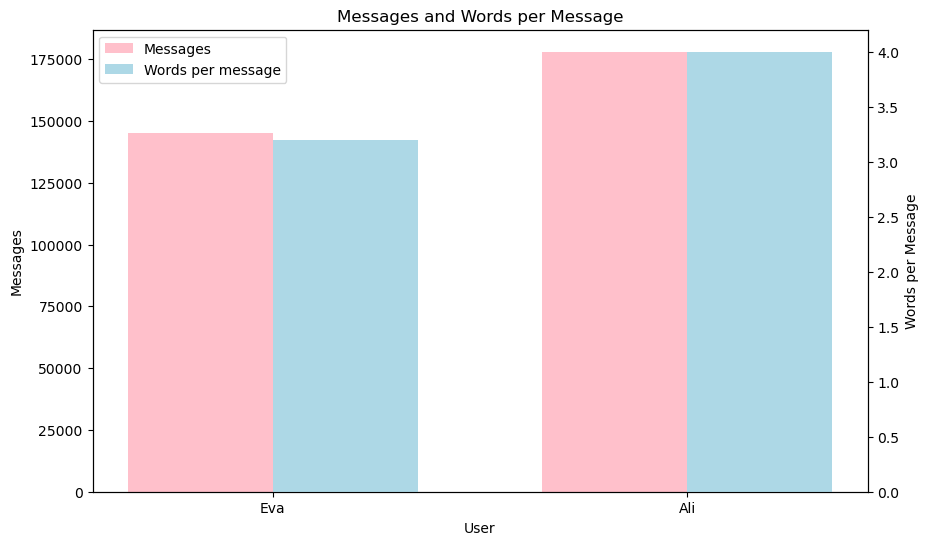

In [6]:
# let's start with the first analysis: how many messages we send each other and how many words we use in each message.
# First, let's see how many messages we send each other.
# Let's see how many messages we send each other.
messages_Eva = df[df['User'] == 'Eva'].shape[0]
print('Messages Eva: ', messages_Eva)
messages_Ali = df[df['User'] == 'Ali'].shape[0]
print('Messages Ali: ', messages_Ali)

# Now, let's see how many words we use in each message.
# Let's see how many words we use in each message.
df['Words'] = df['Text'].str.split().apply(len)
words_Eva = df[df['User'] == 'Eva']['Words'].mean()
print('Words Eva per message: ', words_Eva)
words_Ali = df[df['User'] == 'Ali']['Words'].mean()
print('Words Ali per message: ', words_Ali)


fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot the bars for messages
bar_width = 0.35
index = np.arange(2)
ax1.bar(index - bar_width/2, [messages_Eva, messages_Ali], bar_width, color='pink', label='Messages')
ax1.set_ylabel('Messages')
ax1.set_xlabel('User')
ax1.set_title('Messages and Words per Message')
ax1.set_xticks(index)
ax1.set_xticklabels(['Eva', 'Ali'])

# Create a twin axis for words per message
ax2 = ax1.twinx()
ax2.bar(index + bar_width/2, [words_Eva, words_Ali], bar_width, color='lightblue', label='Words per message')
ax2.set_ylabel('Words per Message')

bars, labels = ax1.get_legend_handles_labels()
bars2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(bars + bars2, labels + labels2, loc='upper left')


plt.show()
    

In [7]:
import plotly.graph_objects as go
import numpy as np


# Plot the bars for messages
bar_width = 0.35
index = np.arange(2)

fig = go.Figure()

fig.add_trace(go.Bar(
    x=index - bar_width/2,
    y=[messages_Eva, messages_Ali],
    width=bar_width,
    name='Messages',
    marker_color='pink'
))

fig.update_layout(
    title='Messages and Words per Message',
    xaxis=dict(
        title='User',
        tickvals=index,
        ticktext=['Eva', 'Ali']
    ),
    yaxis=dict(
        title='Messages'
    ),
    barmode='group'
)

# Create a twin axis for words per message
fig.update_layout(
    yaxis2=dict(
        title='Words per Message',
        overlaying='y',
        side='right'
    )
)

fig.add_trace(go.Bar(
    x=index + bar_width/2,
    y=[words_Eva, words_Ali],
    width=bar_width,
    name='Words per message',
    marker_color='lightblue',
    yaxis='y2'  # Link the trace to the secondary y-axis
))

fig.show()

import plotly.offline as offline

offline.plot(fig, filename='./plots/Messages_Words.html', auto_open=False)


'./plots/Messages_Words.html'

#### Word Cloud

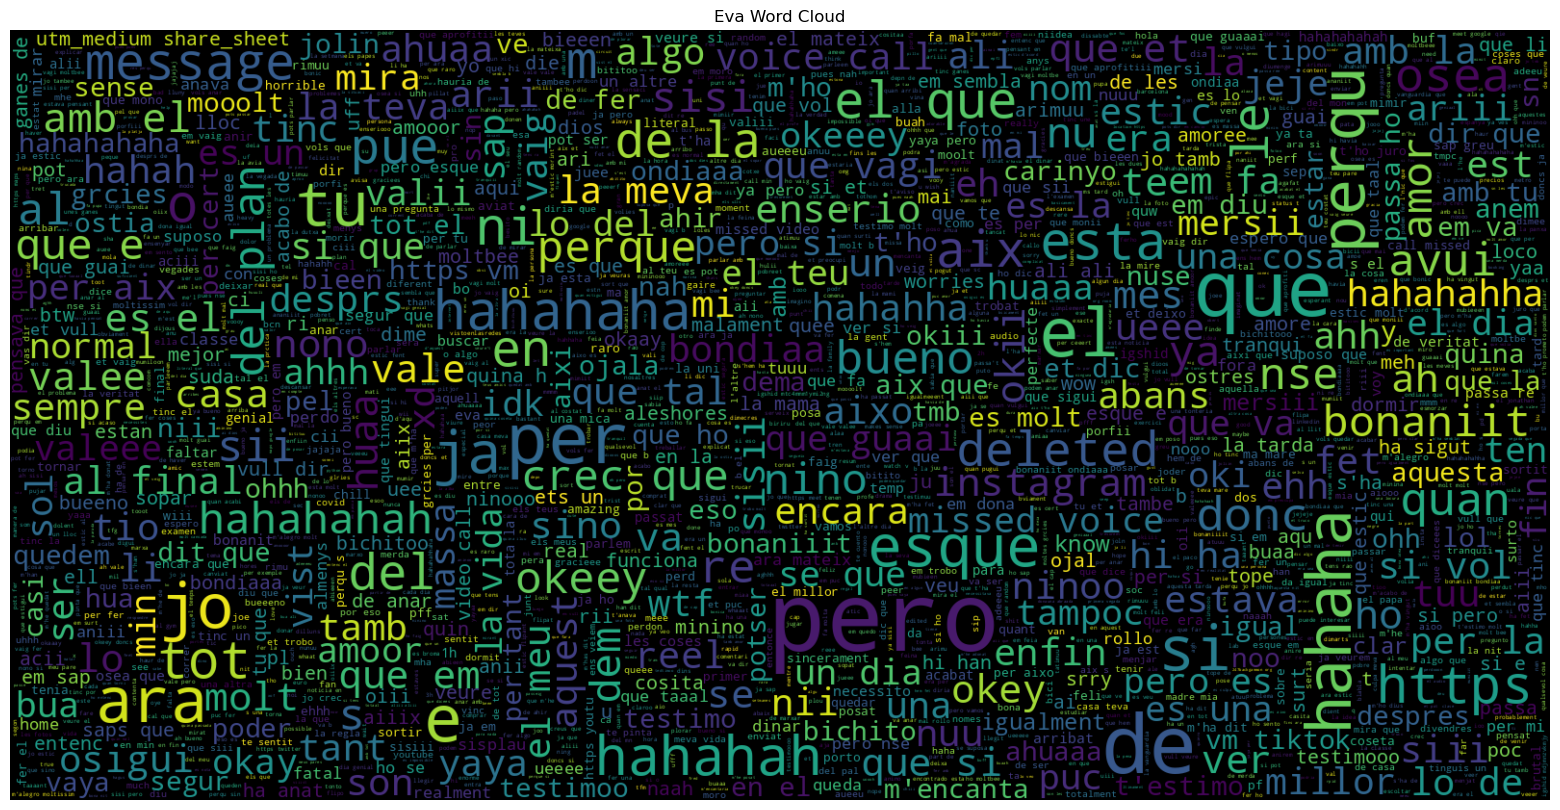

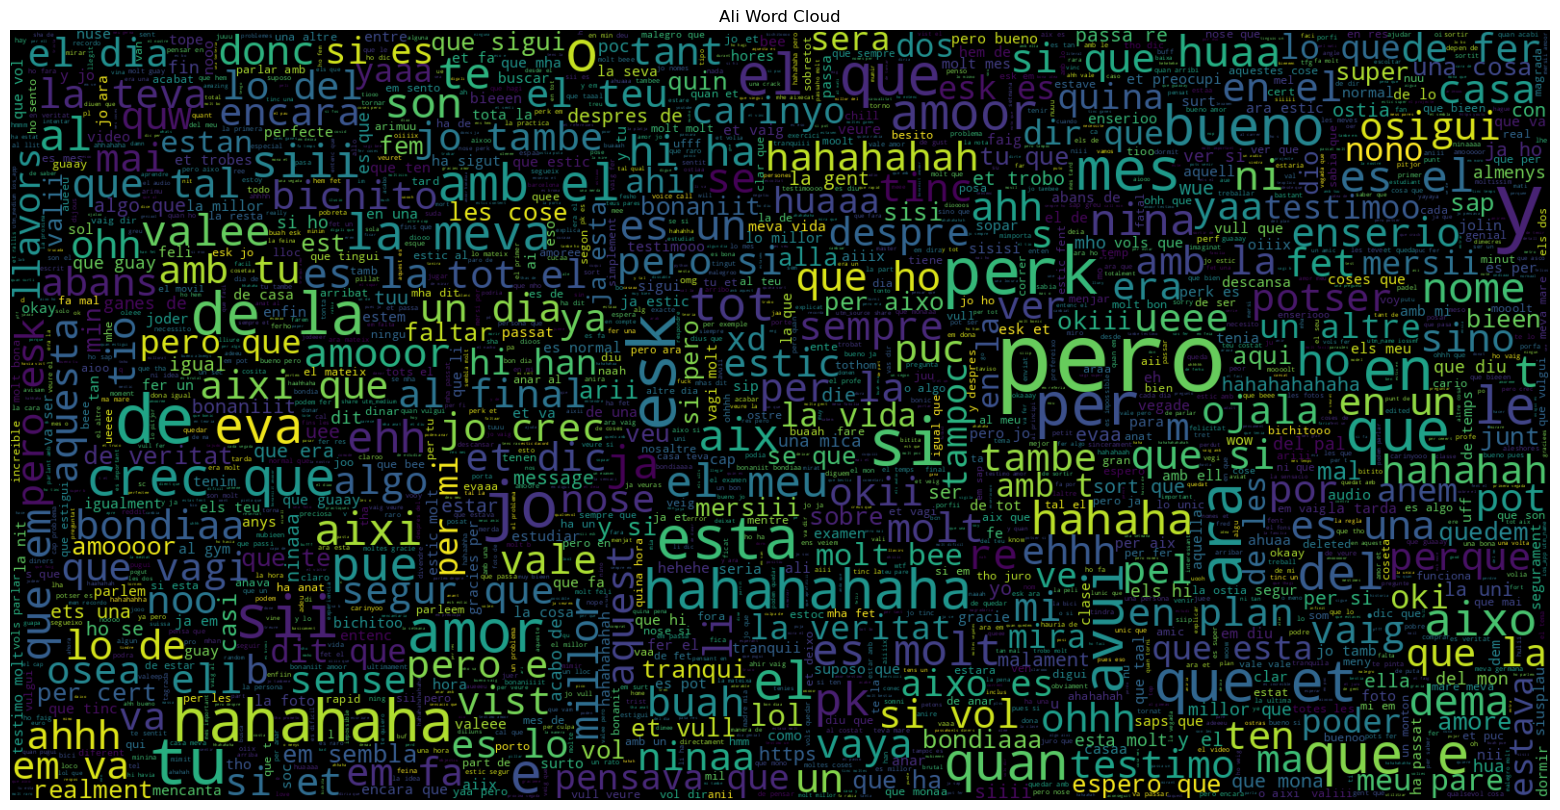

In [13]:
# Now, let's see a word cloud to see which words we use the most.
from wordcloud import WordCloud
from collections import Counter
# make world cloud for Eva
text_Eva = ' '.join(df[df['User'] == 'Eva']['Text'])
wordcloud = WordCloud(width=1600, height=800, max_font_size=100, max_words=2000, background_color='black')
wordcloud = wordcloud.generate(text_Eva)
plt.figure(figsize=(20, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Eva Word Cloud')
plt.show()


from wordcloud import WordCloud
from collections import Counter
# make world cloud for Ali
text_Eva = ' '.join(df[df['User'] == 'Ali']['Text'])
wordcloud = WordCloud(width=1600, height=800, max_font_size=100, max_words=2000, background_color='black')
wordcloud = wordcloud.generate(text_Eva)
plt.figure(figsize=(20, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Ali Word Cloud')
plt.show()
    



#### Time Analysis

In [21]:
df['DateTime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'])
# Set DateTime as index
df.set_index('DateTime', inplace=True)
# Resample to daily frequency and count messages
daily = df.resample('D').size()
hourly = df.resample('H').size()

df['Month'] = df.index.month
df['Year'] = df.index.year
df['Week'] = df.index.week

/tmp/ipykernel_1250/2143098257.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_1250/2143098257.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_1250/2143098257.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_1250

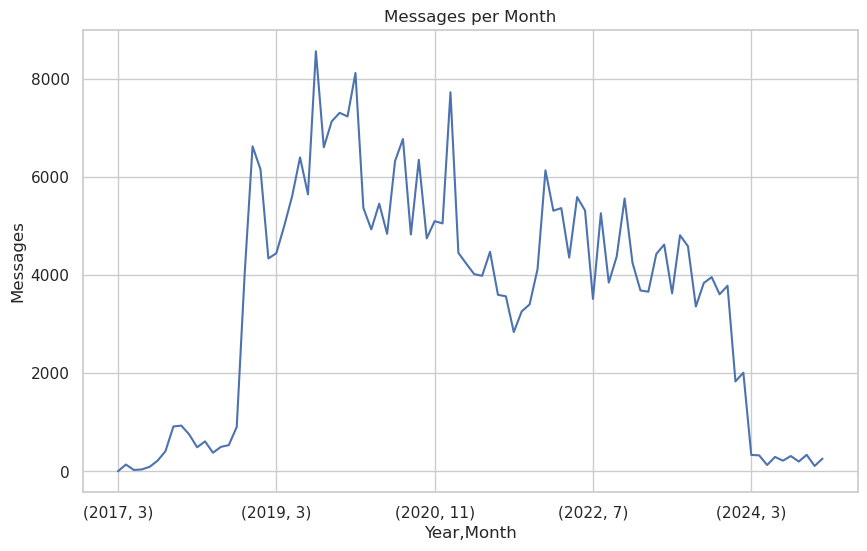

In [22]:
import seaborn as sns
# Set seaborn style
sns.set(style="whitegrid")

# Plot the time series by month of the year
fig, ax = plt.subplots(figsize=(10, 6))
df.groupby(['Year', 'Month']).size().plot(ax=ax)
ax.set_ylabel('Messages')
ax.set_title('Messages per Month')


plt.show()


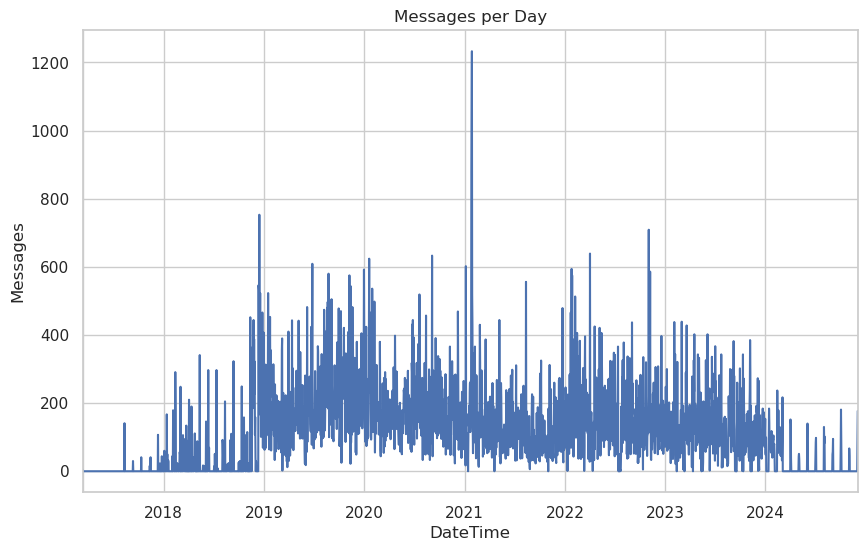

'./plots/000_Messages_per_day.html'

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set seaborn style
sns.set(style="whitegrid")

# Plot the time series by day
fig, ax = plt.subplots(figsize=(10, 6))
df.resample('D').size().plot(ax=ax)
ax.set_ylabel('Messages')
ax.set_title('Messages per Day')

plt.show()

# plot this as plotly
import plotly.graph_objects as go
import numpy as np

fig = go.Figure()

fig.add_trace(go.Scatter(
    x=df.resample('D').size().index,
    y=df.resample('D').size().values,
    mode='lines+markers',
    name='Messages per Day',
    
))

fig.update_layout(
    title='Messages per Day',
    xaxis=dict(title='Date'),
    yaxis=dict(title='Messages')
)

fig.show()
offline.plot(fig, filename='./plots/000_Messages_per_day.html', auto_open=False)


In [44]:
# Assuming df is your DataFrame with columns 'Year' and 'Month'

# Group by 'Year' and 'Month' and count the occurrences
data = df.groupby(['Year', 'Month']).size().reset_index(name='Messages')
# merge month and year into a single column
data['Year'] = data['Year'].astype(str)
data['Month'] = data['Month'].astype(str)
data['Year'] = data['Year'] + '-' + data['Month']


# Plot the time series by month of the year
fig = go.Figure()

fig.add_trace(go.Scatter(
    x=data['Year'],
    y=data['Messages'],
    mode='lines+markers',
    name='Messages'
))

fig.update_layout(
    title='Messages per Month',
    xaxis=dict(
        title='Year'
    ),
    yaxis=dict(
        title='Messages'
    )
)

fig.show()

offline.plot(fig, filename='./plots/Messages_per_month.html', auto_open=False)


'./plots/Messages_per_month.html'

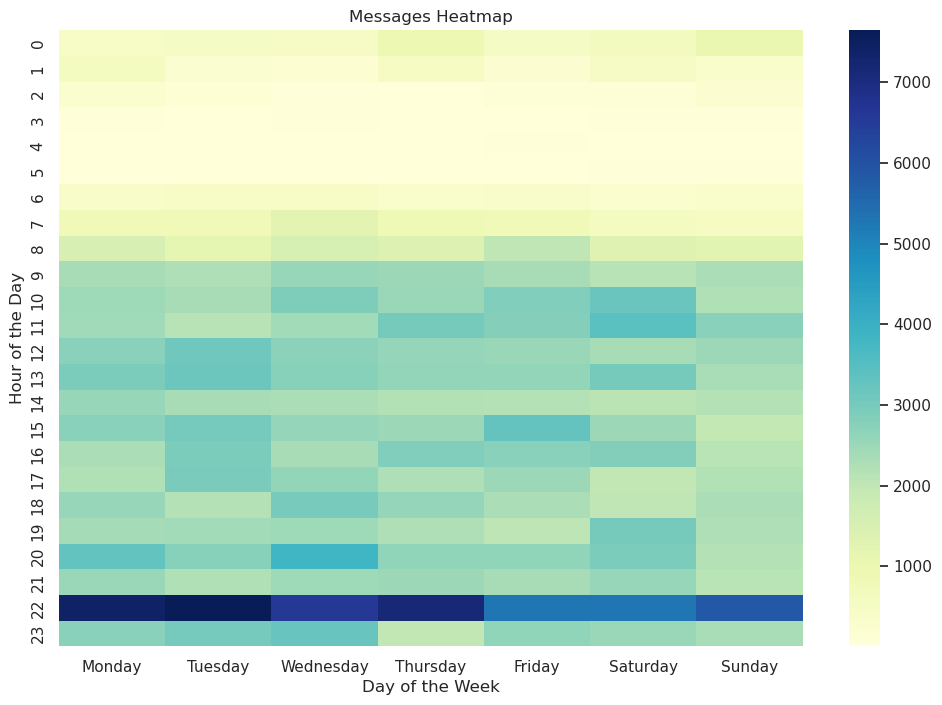

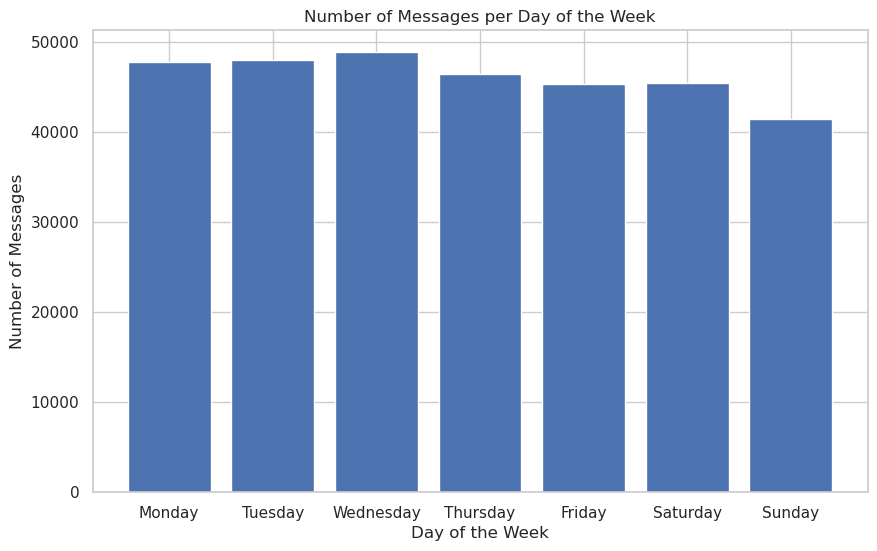

In [32]:

# Now make a heatmap to see at which hours have we sent more messages and at which days of the week we send more messages.
# Plot the heatmap
sns.set(style="whitegrid")
fig, ax = plt.subplots(figsize=(12, 8))
heatmap = df.groupby([df.index.hour, df.index.dayofweek]).size().unstack()
sns.heatmap(heatmap, cmap='YlGnBu')
ax.set_xlabel('Day of the Week')
ax.set_xticklabels(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
ax.set_ylabel('Hour of the Day')
ax.set_title('Messages Heatmap')
# Plot the number of messages per day of the week
fig, ax = plt.subplots(figsize=(10, 6))
messages_per_day = df.groupby(df.index.dayofweek).size()
days_of_week = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
ax.bar(days_of_week, messages_per_day)
ax.set_xlabel('Day of the Week')
ax.set_ylabel('Number of Messages')
ax.set_title('Number of Messages per Day of the Week')
plt.show()

In [45]:
import plotly.graph_objects as go

# Create the heatmap
heatmap = df.groupby([df.index.hour, df.index.dayofweek]).size().unstack()

# Create the heatmap trace
heatmap_trace = go.Heatmap(
    x=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'],
    y=list(range(24)),
    z=heatmap.values.tolist(),
    colorscale='YlGnBu'
)

# Create the layout for the heatmap
heatmap_layout = go.Layout(
    title='Messages Heatmap by Day of the Week and Hour of the Day',
)

# Create the figure and add the trace
fig = go.Figure(data=[heatmap_trace], layout=heatmap_layout)

# Show the figure
fig.show()

offline.plot(fig, filename='./plots/001_Messages_heatmap_week_hour.html', auto_open=False)

'./plots/001_Messages_heatmap_week_hour.html'

In [48]:
import plotly.graph_objects as go

# Plot the number of messages per day of the week
fig = go.Figure()

fig.add_trace(go.Bar(
    x=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'],
    y=messages_per_day,
    marker_color='lightblue',
    name='Number of Messages'
))

fig.update_layout(
    xaxis=dict(
        title='Day of the Week'
    ),
    yaxis=dict(
        title='Number of Messages'
    ),
    title='Number of Messages per Day of the Week'
)

fig.show()


offline.plot(fig, filename='./plots/001_Messages_bar_week.html', auto_open=False)

'./plots/001_Messages_bar_week.html'

/tmp/ipykernel_1250/4157274432.py:27: UserWarning:

FixedFormatter should only be used together with FixedLocator



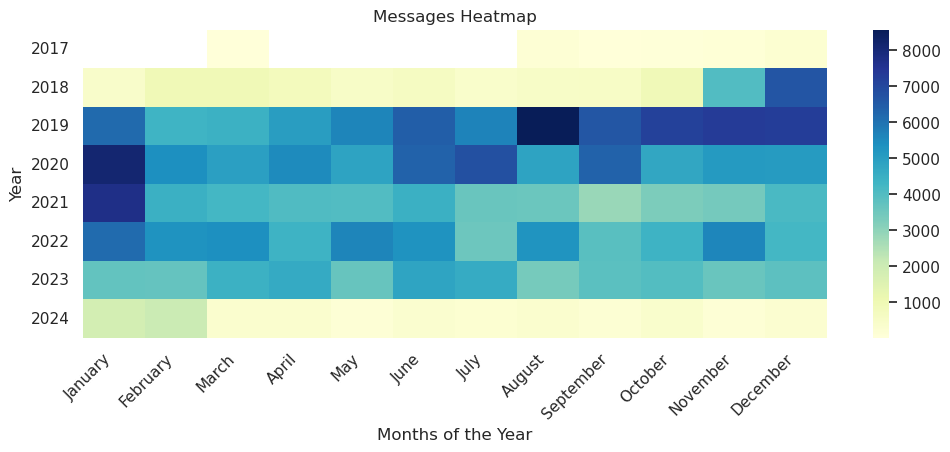

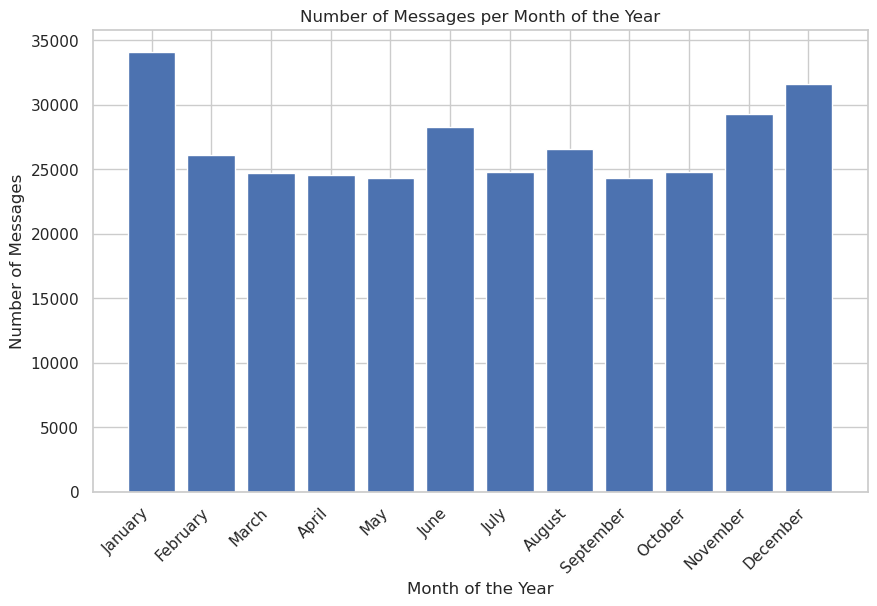

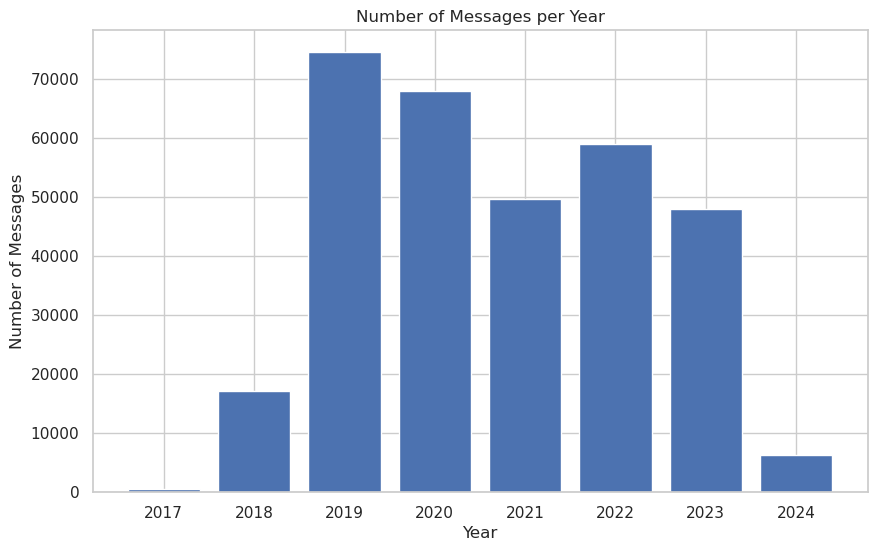

In [52]:
import seaborn as sns

# Set seaborn style
sns.set(style="whitegrid")

# Rest of your code...
months_of_year = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

# Now make a heatmap to see at which hours have we sent more messages and at which days of the week we send more messages.
# Plot the heatmap
fig, ax = plt.subplots(figsize=(12, 4))
heatmap = df.groupby([df.index.year, df.index.month]).size().unstack()
sns.heatmap(heatmap, cmap='YlGnBu')
ax.set_xlabel('Months of the Year')
ax.set_xticklabels(['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])
ax.set_ylabel('Year')
ax.set_title('Messages Heatmap')
ax.set_xticklabels(months_of_year, rotation=45, ha='right')

# Plot the number of messages per month
fig, ax = plt.subplots(figsize=(10, 6))
messages_per_month = df.groupby(df.index.month).size()
ax.bar(months_of_year, messages_per_month)
ax.set_xlabel('Month of the Year')
ax.set_ylabel('Number of Messages')
ax.set_title('Number of Messages per Month of the Year')
ax.set_xticklabels(months_of_year, rotation=45, ha='right')

# plot a distribution of which are the years with more messages.
# Plot the number of messages per year
fig, ax = plt.subplots(figsize=(10, 6))
messages_per_year = df.groupby(df.index.year).size()
ax.bar(messages_per_year.index, messages_per_year)
ax.set_xlabel('Year')
ax.set_ylabel('Number of Messages')
ax.set_title('Number of Messages per Year')


plt.show()


In [62]:
import plotly.graph_objects as go

# Plot the heatmap
heatmap_trace = go.Heatmap(
    x=months_of_year,
    y=df.index.year.unique(),
    z=heatmap.values,
    colorscale='YlGnBu'
)
heatmap_layout = go.Layout(
    title='Messages Heatmap',
    xaxis=dict(title='Months of the Year'),
    yaxis=dict(title='Year')
)
heatmap_fig = go.Figure(data=[heatmap_trace], layout=heatmap_layout)
heatmap_fig.show()

offline.plot(heatmap_fig, filename='./plots/002_Messages_heatmap_month_year.html', auto_open=False)

# Plot the number of messages per month
bar_trace = go.Bar(
    x=months_of_year,
    y=messages_per_month.values,
    marker_color='lightblue',
    name='Number of Messages'
)
bar_layout = go.Layout(
    title='Number of Messages per Month of the Year',
    xaxis=dict(title='Month of the Year'),
    yaxis=dict(title='Number of Messages')
)
bar_fig = go.Figure(data=[bar_trace], layout=bar_layout)
bar_fig.show()

offline.plot(bar_fig, filename='./plots/002_Messages_bar_month.html', auto_open=False)

# Plot the number of messages per year
bar_trace = go.Bar(
    x=messages_per_year.index,
    y=messages_per_year.values,
    marker_color='lightblue',
    name='Number of Messages'
)
bar_layout = go.Layout(
    title='Number of Messages per Year',
    xaxis=dict(title='Year'),
    yaxis=dict(title='Number of Messages')
)
bar_fig = go.Figure(data=[bar_trace], layout=bar_layout)
bar_fig.show()

# 
offline.plot(bar_fig, filename='./plots/002_Messages_bar_year.html', auto_open=False)

'./plots/002_Messages_bar_year.html'

#### Audios, Images, Videos, Stickers

Audio Eva:  18058
Audio Ali:  3905
Image Eva:  8635
Image Ali:  4808
Video Eva:  945
Video Ali:  397
Sticker Eva:  3040
Sticker Ali:  872


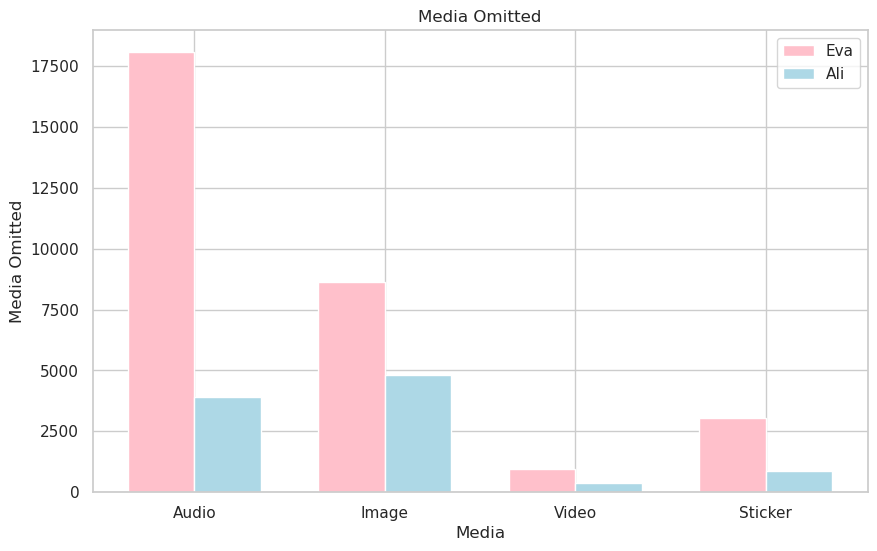

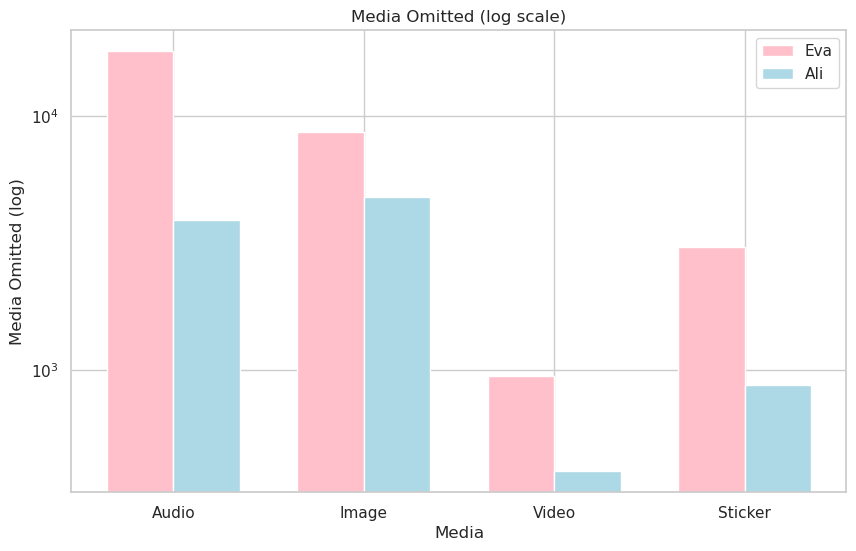

In [55]:
# Now, we will find the amout of messages, that Ali and Eva send each other with the text "audio omitted" in it.
# Let's see who sends more audio messages.
audio_Eva = df_omit[df_omit['User'] == 'Eva']['Text'].str.contains('audio omitted').sum()
print('Audio Eva: ', audio_Eva)
audio_Ali = df_omit[df_omit['User'] == 'Ali']['Text'].str.contains('audio omitted').sum()
print('Audio Ali: ', audio_Ali)

image_Eva = df_omit[df_omit['User'] == 'Eva']['Text'].str.contains('image omitted').sum()
print('Image Eva: ', image_Eva)
image_Ali = df_omit[df_omit['User'] == 'Ali']['Text'].str.contains('image omitted').sum()
print('Image Ali: ', image_Ali)

video_Eva = df_omit[df_omit['User'] == 'Eva']['Text'].str.contains('video omitted').sum()
print('Video Eva: ', video_Eva)
video_Ali = df_omit[df_omit['User'] == 'Ali']['Text'].str.contains('video omitted').sum()
print('Video Ali: ', video_Ali)

sticker_Eva = df_omit[df_omit['User'] == 'Eva']['Text'].str.contains('sticker omitted').sum()
print('Sticker Eva: ', sticker_Eva)
sticker_Ali = df_omit[df_omit['User'] == 'Ali']['Text'].str.contains('sticker omitted').sum()
print('Sticker Ali: ', sticker_Ali)



# Plot the bars for media omitted by Eva

fig, ax = plt.subplots(figsize=(10, 6))
bar_width = 0.35
index = np.arange(4)
ax.bar(index - bar_width/2, [audio_Eva, image_Eva, video_Eva, sticker_Eva], bar_width, color='pink', label='Eva')
ax.bar(index + bar_width/2, [audio_Ali, image_Ali, video_Ali, sticker_Ali], bar_width, color='lightblue', label='Ali')
ax.set_ylabel('Media Omitted')
ax.set_xlabel('Media')
ax.set_title('Media Omitted')
ax.set_xticks(index)
ax.set_xticklabels(['Audio', 'Image', 'Video', 'Sticker'])

ax.legend()

plt.show()
# log y scale
fig, ax = plt.subplots(figsize=(10, 6))
bar_width = 0.35
index = np.arange(4)
ax.bar(index - bar_width/2, [audio_Eva, image_Eva, video_Eva, sticker_Eva], bar_width, color='pink', label='Eva')
ax.bar(index + bar_width/2, [audio_Ali, image_Ali, video_Ali, sticker_Ali], bar_width, color='lightblue', label='Ali')
ax.set_ylabel('Media Omitted (log)')
ax.set_xlabel('Media')
ax.set_title('Media Omitted (log scale)')
ax.set_xticks(index)
ax.set_xticklabels(['Audio', 'Image', 'Video', 'Sticker'])

ax.legend()
ax.set_yscale('log')
plt.show()


In [63]:
import plotly.graph_objects as go

fig = go.Figure()

fig.add_trace(go.Bar(
    x=['Audio', 'Image', 'Video', 'Sticker'],
    y=[audio_Eva, image_Eva, video_Eva, sticker_Eva],
    name='Eva',
    marker_color='pink'
))

fig.add_trace(go.Bar(
    x=['Audio', 'Image', 'Video', 'Sticker'],
    y=[audio_Ali, image_Ali, video_Ali, sticker_Ali],
    name='Ali',
    marker_color='lightblue'
))

fig.update_layout(
    title='Media Omitted',
    xaxis=dict(title='Media'),
    yaxis=dict(title='Media Omitted')
)

fig.show()


offline.plot(fig, filename='./plots/003_Media.html', auto_open=False)


'./plots/003_Media.html'

#### AI model

In [15]:
# # Machine Learning to predict if text is sent by Eva or Ali
# from sklearn.model_selection import train_test_split
# from sklearn.feature_extraction.text import CountVectorizer
# from sklearn.naive_bayes import MultinomialNB
# from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
# from sklearn.ensemble import RandomForestClassifier

# # Split the data into training and test sets
# X_train, X_test, y_train, y_test = train_test_split(df['Text'], df['User'], test_size=0.2, random_state=42)

# # Initialize the vectorizer
# vectorizer = CountVectorizer()

# # Fit and transform the training data
# X_train = vectorizer.fit_transform(X_train)

# # Transform the test set
# X_test = vectorizer.transform(X_test)

# # Initialize the classifier
# classifier = RandomForestClassifier(n_estimators=100, verbose=2, n_jobs=-1)

# classifier.fit(X_train, y_train)

# # Check the accuracy
# accuracy = accuracy_score(y_test, classifier.predict(X_test))
# print('Accuracy: ', accuracy)

# # Make predictions
# y_pred = classifier.predict(X_test)

# # plot confusion matrix
# conf_matrix = confusion_matrix(y_test, y_pred)
# fig, ax = plt.subplots(figsize=(8, 8))
# sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='YlGnBu', cbar=False, ax=ax)
# ax.set_xlabel('Predicted')
# ax.set_ylabel('Actual')
# ax.set_title('Confusion Matrix')
# ax.set_xticklabels(['Ali', 'Eva'])
# ax.set_yticklabels(['Ali', 'Eva'])
# plt.show()



In [16]:
# # save model
# import joblib
# joblib.dump(classifier, 'model2.pkl')
# joblib.dump(vectorizer, 'vectorizer2.pkl')


In [66]:
# Load the model and vectorizer
import joblib
model = joblib.load('model2.pkl')
vectorizer = joblib.load('vectorizer2.pkl')


In [67]:
# make a program that I can input a text and the model predicts
text = ["Soc de Iraq"]

text = vectorizer.transform(text)
huaa = model.predict(text)

print(huaa)
print(model.predict_proba(text))


['Ali']
[[0.91876013 0.08123987]]


[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.1s finished


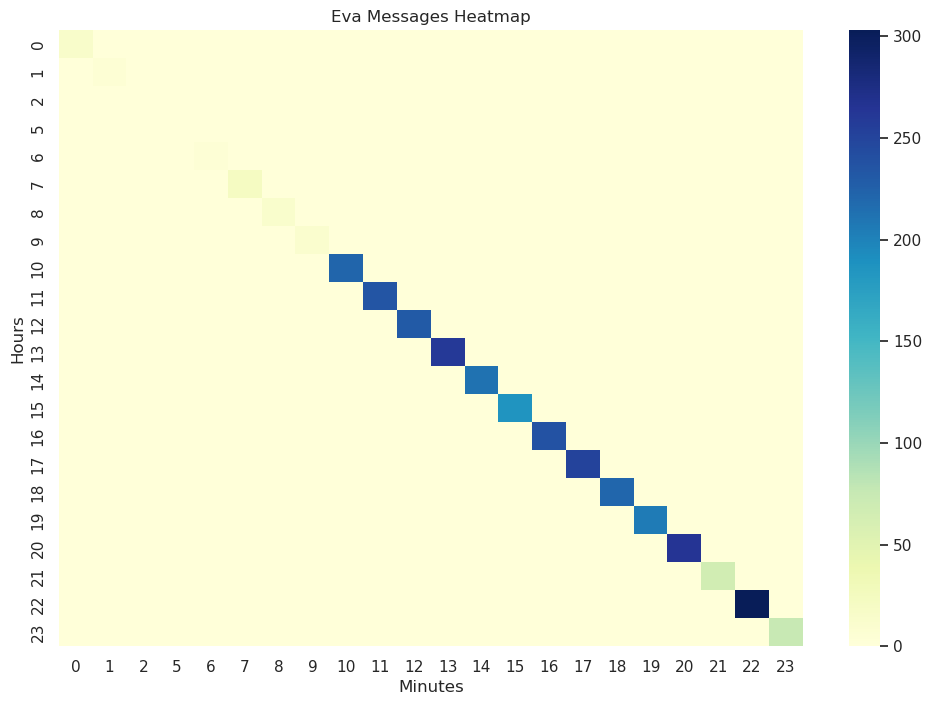

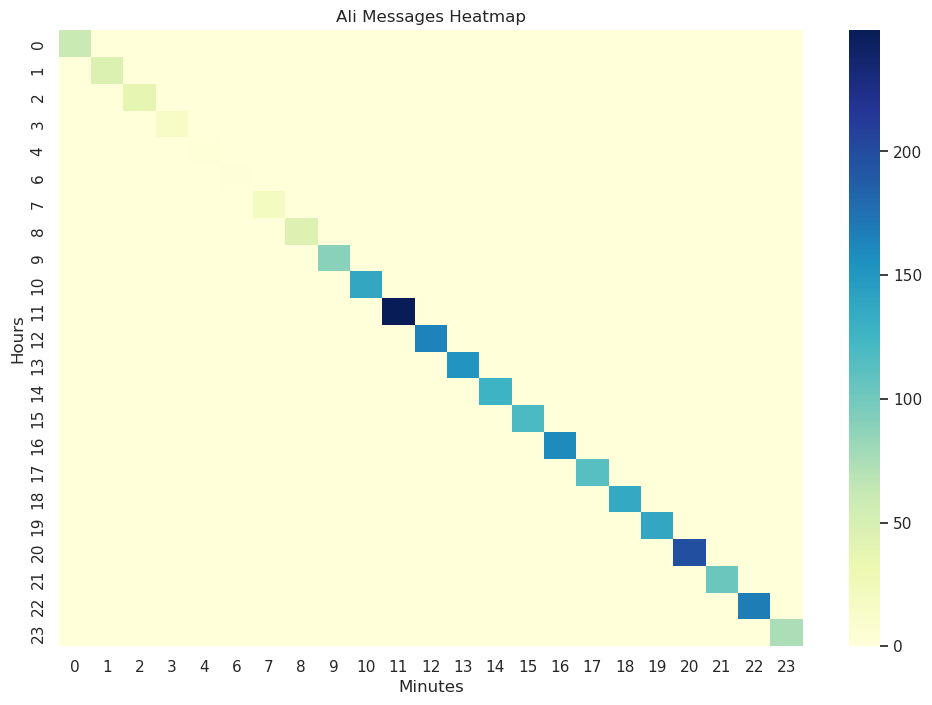

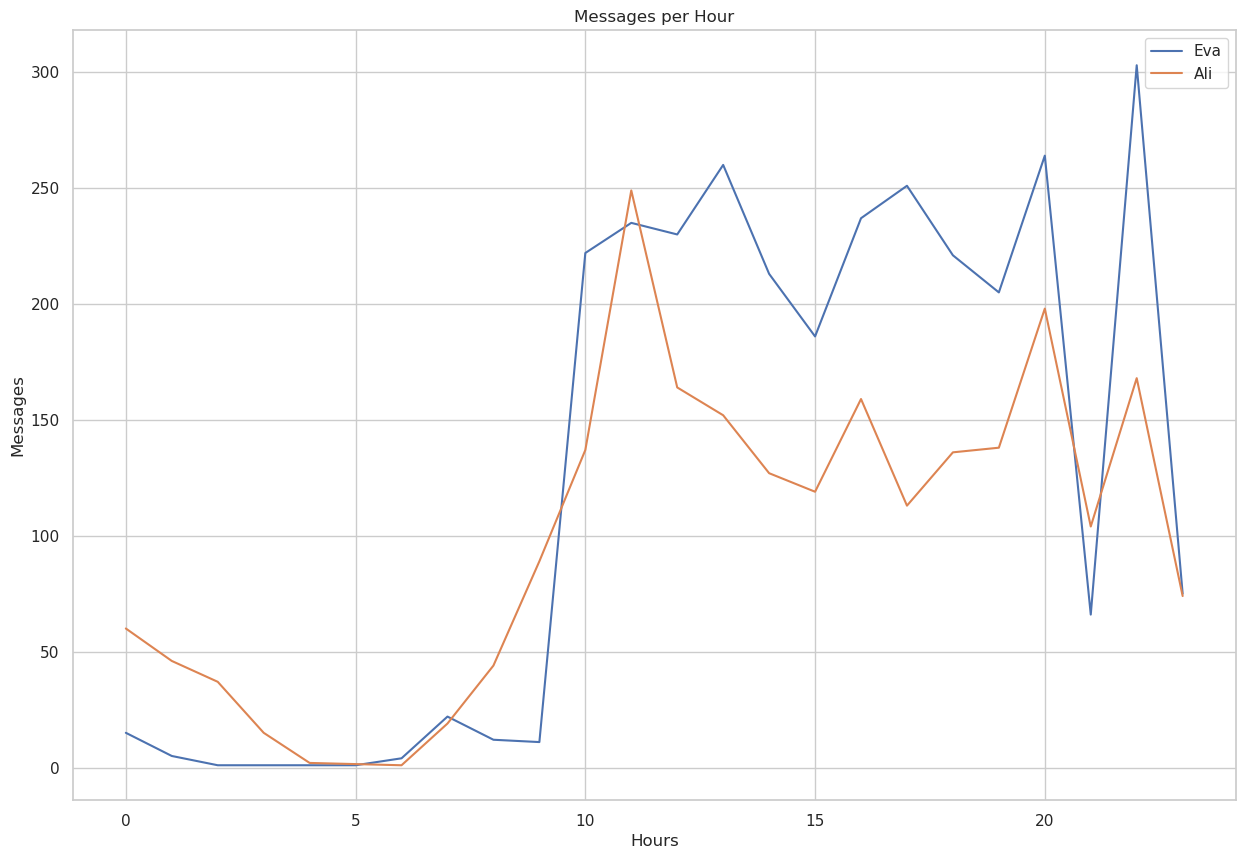

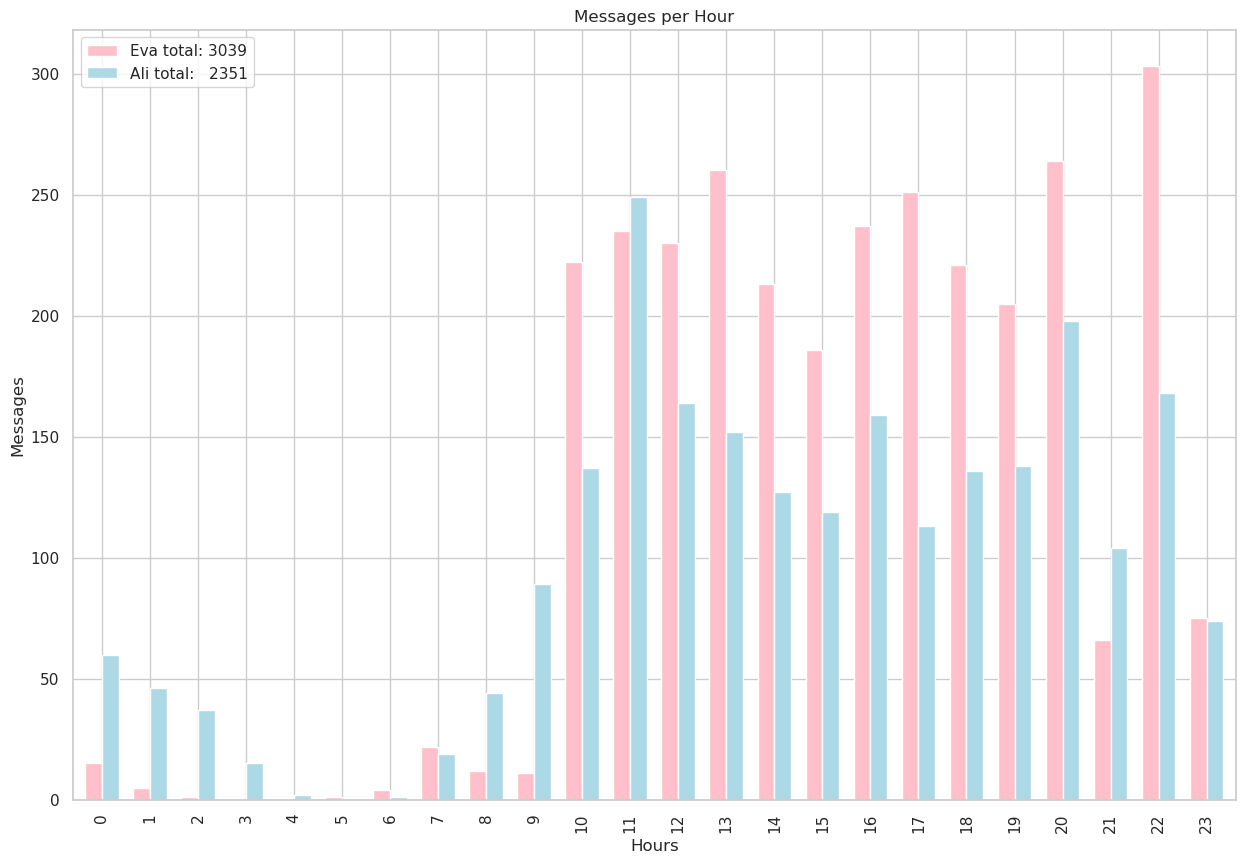

In [69]:
import re
# from the df find all the texts that contain hours, like 00:00, 01:01, 02:02, until 23:23 also the format could be any so also 00 00 would be valid
# and make a plot to see at what time we send more messages.
# Find all the texts that contain hours they can be expressd as XX:YY or XX YY for ali and eva, where XX and YY are numbers from 00 to 23 and are equal

# Find all the texts that contain hours

hours_Eva = df[df['User'] == 'Eva']
hours_Eva = hours_Eva['Text'].str.extract(r'(\d{2})[: ](\d{2})')
hours_Eva.dropna(inplace=True)
hours_Eva = hours_Eva.astype(int)
hours_Eva = hours_Eva[(hours_Eva[0] < 24) & (hours_Eva[1] < 24)]
hours_Eva = hours_Eva[hours_Eva[0]==hours_Eva[1]]
total_Eva = hours_Eva.shape[0]
hours_Eva = hours_Eva.groupby([0, 1]).size()
hours_Eva = hours_Eva.unstack().fillna(0)
# Find all the texts that contain hours
hours_Ali = df[df['User'] == 'Ali']
hours_Ali = hours_Ali['Text'].str.extract(r'(\d{2})[: ](\d{2})')
hours_Ali.dropna(inplace=True)
hours_Ali = hours_Ali.astype(int)
hours_Ali = hours_Ali[(hours_Ali[0] < 24) & (hours_Ali[1] < 24)]
hours_Ali = hours_Ali[hours_Ali[0]==hours_Ali[1]]
total_Ali = hours_Ali.shape[0]
hours_Ali = hours_Ali.groupby([0, 1]).size()
hours_Ali = hours_Ali.unstack().fillna(0)


fig, ax = plt.subplots(figsize=(12, 8))
sns.heatmap(hours_Eva, cmap='YlGnBu', ax=ax)
ax.set_xlabel('Minutes')
ax.set_ylabel('Hours')
ax.set_title('Eva Messages Heatmap')
plt.show()

# Plot the heatmap
fig, ax = plt.subplots(figsize=(12, 8))
sns.heatmap(hours_Ali, cmap='YlGnBu', ax=ax)
ax.set_xlabel('Minutes')
ax.set_ylabel('Hours')
ax.set_title('Ali Messages Heatmap')

plt.show()

# Plot the
fig, ax = plt.subplots(figsize=(15, 10))
hours_Eva.sum().plot(ax=ax, label='Eva')
hours_Ali.sum().plot(ax=ax, label='Ali')
ax.set_xlabel('Hours')
ax.set_ylabel('Messages')
ax.set_title('Messages per Hour')
ax.legend()
plt.show()

# plot the total amount of messages in the hours_Eva and Ali and plot it bar plot
fig, ax = plt.subplots(figsize=(15, 10))
df_hours = pd.DataFrame({'Eva total: {}'.format(total_Eva): hours_Eva.sum(), 'Ali total:   {}'.format(total_Ali): hours_Ali.sum()})
df_hours.plot(ax=ax, kind='bar', color=['pink', 'lightblue'], width=0.7)
ax.set_xlabel('Hours')
ax.set_ylabel('Messages')
ax.set_title('Messages per Hour')
ax.legend()

plt.show()





In [104]:
import plotly.graph_objects as go

# Plot the heatmap for Eva
heatmap_fig_Eva = go.Figure(data=go.Heatmap(
    x=hours_Eva.columns,
    y=hours_Eva.index,
    z=hours_Eva.values,
    colorscale='YlGnBu'
))
heatmap_fig_Eva.update_layout(
    title='Eva Messages Heatmap',
    xaxis_title='Minutes',
    yaxis_title='Hours'
)
heatmap_fig_Eva.update_traces(colorscale=[[0, 'rgb(255,255,255)'], [0.125, 'rgb(237,248,177)'], [0.25, 'rgb(199,233,180)'], [0.375, 'rgb(127,205,187)'], [0.5, 'rgb(65,182,196)'], [0.625, 'rgb(29,145,192)'], [0.75, 'rgb(34,94,168)'], [0.875, 'rgb(37,52,148)'], [1, 'rgb(8,29,88)']])

heatmap_fig_Eva.show()


offline.plot(heatmap_fig_Eva, filename='./plots/004_Hours_Eva_heatmap.html', auto_open=False)
# Plot the heatmap for Ali

heatmap_fig_Ali = go.Figure(data=go.Heatmap(
    x=hours_Ali.columns,
    y=hours_Ali.index,
    z=hours_Ali.values,
    colorscale='YlGnBu'
))
heatmap_fig_Ali.update_layout(
    title='Ali Messages Heatmap',
    xaxis_title='Minutes',
    yaxis_title='Hours'
)
heatmap_fig_Ali.update_traces(colorscale=[[0, 'rgb(255,255,255)'], [0.125, 'rgb(237,248,177)'], [0.25, 'rgb(199,233,180)'], [0.375, 'rgb(127,205,187)'], [0.5, 'rgb(65,182,196)'], [0.625, 'rgb(29,145,192)'], [0.75, 'rgb(34,94,168)'], [0.875, 'rgb(37,52,148)'], [1, 'rgb(8,29,88)']])

heatmap_fig_Ali.show()

offline.plot(heatmap_fig_Ali, filename='./plots/004_Hours_Ali_heatmap.html', auto_open=False)

# Plot the Messages per Hour
messages_per_hour_fig = go.Figure()
messages_per_hour_fig.add_trace(go.Scatter(
    x=hours_Eva.sum().index,
    y=hours_Eva.sum().values,
    mode='lines+markers',
    name='Eva'
))
messages_per_hour_fig.add_trace(go.Scatter(
    x=hours_Ali.sum().index,
    y=hours_Ali.sum().values,
    mode='lines+markers',
    name='Ali'
))
messages_per_hour_fig.update_layout(
    title='Messages per Hour',
    xaxis_title='Hours',
    yaxis_title='Messages'
)
messages_per_hour_fig.show()

offline.plot(messages_per_hour_fig, filename='./plots/005_messages_per_hour_fig.html', auto_open=False)


# Plot the total amount of messages in the hours_Eva and Ali as a bar plot
df_hours = pd.DataFrame({'Eva total: {}'.format(total_Eva): hours_Eva.sum(), 'Ali total:   {}'.format(total_Ali): hours_Ali.sum()})
bar_fig = go.Figure(data=[
    go.Bar(
        x=df_hours.index,
        y=df_hours[column],
        name=column.split(':')[0].strip(),
        marker_color=['pink', 'lightblue'][i]
    ) for i, column in enumerate(df_hours.columns)
])
bar_fig.update_layout(
    title='Messages per Hour',
    xaxis_title='Hours',
    yaxis_title='Messages'
)
bar_fig.show()

offline.plot(bar_fig, filename='./plots/005_ bar_messages_per_hour_fig.html', auto_open=False)


'./plots/005_ bar_messages_per_hour_fig.html'

In [120]:
# Plot the total amount of messages in the hours_Eva and Ali as a bar plot
df_hours = pd.DataFrame({'Eva total: {}'.format(total_Eva): hours_Eva.sum(), 'Ali total:   {}'.format(total_Ali): hours_Ali.sum()})
bar_fig = go.Figure(data=[
    go.Bar(
        x=df_hours.index,
        y=df_hours[column],
        name=column.split(':')[0].strip(),
        marker_color=['pink', 'lightblue'][i]
    ) for i, column in enumerate(df_hours.columns)
])

# Add scatter plot trace from messages_per_hour_fig
bar_fig.add_trace(go.Scatter(
    x=hours_Eva.sum().index,
    y=hours_Eva.sum().values,
    mode='lines+markers',
    marker_color='darkred',
    name='Eva'
))
bar_fig.add_trace(go.Scatter(
    x=hours_Ali.sum().index,
    y=hours_Ali.sum().values,
    mode='lines+markers',
    marker_color='darkblue',
    name='Ali'
))

bar_fig.update_layout(
    title='Messages per Hour',
    xaxis_title='Hours',
    yaxis_title='Messages'
)
bar_fig.show()


offline.plot(bar_fig, filename='./plots/005_line?bar_messages_per_hour_fig.html', auto_open=False)


'./plots/005_line?bar_messages_per_hour_fig.html'

In [121]:
hours_Eva = df[df['User'] == 'Eva']
hours_Eva = hours_Eva['Text'].str.extract(r'(\d{2})[: ](\d{2})')
hours_Eva.dropna(inplace=True)
hours_Eva = hours_Eva.astype(int)
hours_Eva = hours_Eva[(hours_Eva[0] < 24) & (hours_Eva[1] < 24)]
hours_Eva = hours_Eva[hours_Eva[0]==hours_Eva[1]]
hours_Eva['h'] = hours_Eva.index.hour
hours_Eva['m'] = hours_Eva.index.minute
hours_Eva['s'] = hours_Eva.index.second

# Find all the texts that contain hours
hours_Ali = df[df['User'] == 'Ali']
hours_Ali = hours_Ali['Text'].str.extract(r'(\d{2})[: ](\d{2})')
hours_Ali.dropna(inplace=True)
hours_Ali = hours_Ali.astype(int)
hours_Ali = hours_Ali[(hours_Ali[0] < 24) & (hours_Ali[1] < 24)]
hours_Ali = hours_Ali[hours_Ali[0]==hours_Ali[1]]
hours_Ali['h'] = hours_Ali.index.hour
hours_Ali['m'] = hours_Ali.index.minute
hours_Ali['s'] = hours_Ali.index.second

Eva_accuracy =  hours_Eva[(hours_Eva[0]==hours_Eva[1])&(hours_Eva[0]==hours_Eva['h'])&(hours_Eva[0]==hours_Eva['m'])].shape[0]/hours_Eva.shape[0]
print('Eva_accuracy: ', round(Eva_accuracy*100,2), '%')

Ali_accuracy =  hours_Ali[(hours_Ali[0]==hours_Ali[1])&(hours_Ali[0]==hours_Ali['h'])&(hours_Ali[0]==hours_Ali['m'])].shape[0]/hours_Ali.shape[0]
print('Ali_accuracy: ', round(Ali_accuracy*100,2), '%')

Eva_accuracy:  84.01 %
Ali_accuracy:  83.03 %


In [149]:

hours_Eva = df[df['User'] == 'Eva']
hours_Eva = hours_Eva['Text'].str.extract(r'(\d{2})[: ](\d{2})[: ](\d{2})')
hours_Eva.dropna(inplace=True)
hours_Eva = hours_Eva.astype(int)
hours_Eva = hours_Eva[(hours_Eva[0] < 24) & (hours_Eva[1] < 24)]
hours_Eva = hours_Eva[hours_Eva[0]==hours_Eva[1]]
hours_Eva['h'] = hours_Eva.index.hour
hours_Eva['m'] = hours_Eva.index.minute
hours_Eva['s'] = hours_Eva.index.second

# Find all the texts that contain hours
hours_Ali = df[df['User'] == 'Ali']
hours_Ali = hours_Ali['Text'].str.extract(r'(\d{2})[: ](\d{2})[: ](\d{2})')
hours_Ali.dropna(inplace=True)
hours_Ali = hours_Ali.astype(int)
hours_Ali = hours_Ali[(hours_Ali[0] < 24) & (hours_Ali[1] < 24)]
hours_Ali = hours_Ali[hours_Ali[0]==hours_Ali[1]]
hours_Ali['h'] = hours_Ali.index.hour
hours_Ali['m'] = hours_Ali.index.minute
hours_Ali['s'] = hours_Ali.index.second

# Super Accuracy, who guessed the seconds too?
Eva_super_accuracy =  hours_Eva[(hours_Eva[0]==hours_Eva[1])&(hours_Eva[0]==hours_Eva['h'])&(hours_Eva[0]==hours_Eva['m'])&(hours_Eva[0]==hours_Eva['s'])].shape[0]/hours_Eva.shape[0]
print('Eva_super_accuracy: ', round(Eva_super_accuracy*100,2), '%')

Ali_super_accuracy =  hours_Ali[(hours_Ali[0]==hours_Ali[1])&(hours_Ali[0]==hours_Ali['h'])&(hours_Ali[0]==hours_Ali['m'])&(hours_Ali[0]==hours_Ali['s'])].shape[0]/hours_Ali.shape[0]
print('Ali_super_accuracy: ', round(Ali_super_accuracy*100,2), '%') 


Eva_super_accuracy:  1.99 %
Ali_super_accuracy:  1.75 %


In [160]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Create a subplot with 1 row and 2 columns
fig = make_subplots(rows=1, cols=2, subplot_titles=('Ali Results', 'Eva Results'), specs=[[{'type':'domain'}, {'type':'domain'}]])

# Create a pie plot for Eva
fig.add_trace(go.Pie(labels=['Eva Accuracy', 'Eva Incorrect'], values=[Eva_accuracy, 1 - Eva_accuracy], name='Eva', marker_colors=['pink', 'lightgray']), 1, 2)

# Create a pie plot for Ali
fig.add_trace(go.Pie(labels=['Ali Accuracy', 'Ali Incorrect'], values=[Ali_accuracy, 1 - Ali_accuracy], name='Ali', marker_colors=['lightblue', 'lightgray']), 1, 1)

# Update layout for tight margin
# This can help the pie chart fit into the subplot area
fig.update_layout(margin=dict(t=50, b=50, l=50, r=50))

# Set title 
fig.update_layout(title_text='Accuracy of Hours & Minutes')
# add text in the middle of the two plots
fig.add_annotation(
    x=0.5,
    y=0.1,
    text="Superaccuracy Hours, Minutes, & Seconds",
    showarrow=False,
    font=dict(
        size=14
    )
)
fig.add_annotation(
    x=0.5,
    y=0.01,
    text="Ali: {}% \n\n Eva: {}%".format(round(Ali_super_accuracy*100,2), round(Eva_super_accuracy*100,2)),
    showarrow=False,
    font=dict(
        size=12
    )
)

# Display the figure
fig.show()

offline.plot(fig, filename='./plots/006_Accuracy_of_Hours.html', auto_open=False)


'./plots/006_Accuracy_of_Hours.html'

#### First I Love you

In [161]:
# save in the dataframe all the messages with estim and rimu


estimo_Eva = df[(df['User'] == 'Eva')]['Text'].str.contains('estim|rimu')
estimo_Eva_df = df[(df['User'] == 'Eva')]['Text'][estimo_Eva]
print('Estimo Eva: ', estimo_Eva.sum())
estimo_Ali = df[df['User'] == 'Ali']['Text'].str.contains('estim|rimu')
estimo_Ali_df = df[(df['User'] == 'Ali')]['Text'][estimo_Ali]
print('Estimo Ali: ', estimo_Ali.sum())



Estimo Eva:  2093
Estimo Ali:  2878


In [165]:
import plotly.graph_objects as go

# Calculate the sum of estimo_Ali and estimo_Eva
estimo_Ali_sum = estimo_Ali.sum()
estimo_Eva_sum = estimo_Eva.sum()

# Create a bar chart
fig = go.Figure(data=[
    go.Bar(name='Estimo Ali', x=['Estimo Ali'], y=[estimo_Ali_sum], marker_color='lightblue'),
    go.Bar(name='Estimo Eva', x=['Estimo Eva'], y=[estimo_Eva_sum], marker_color='pink')
])

# Set the chart title and axis labels
fig.update_layout(
    title='Estimo and Rimu Counter',
    xaxis_title='User',
    yaxis_title='Sum'
)

# Show the chart
fig.show()

offline.plot(fig, filename='./plots/007_Estimo_count.html', auto_open=False)


'./plots/007_Estimo_count.html'

Curiosament, el primer `T'estimo`, el va dir el Pau en el seu poema dedicat a noosaltres titulat:

***"El secret de l'amor"***

*Una brisa tranquila, sota una pluja intensa.*\
*Brama la tempesta*\
*Sota la incertesa del viure.*\
 \
*Hi ha un punt de calma, dolçament lliscant;*\
*Allunyat de tots i tothom,*\
*On dos figures s'estimen.*

*La calma de la tempesta;*\
*Una espelma en la fosca.*\
*Però lluny del que sembla, la tempesta no amaina.*

*Hi han dos cors, dos ales, dos flames que cremen; dues dances d'amor lluitant sota la por.*

*Hi ha pors! inquietuts!*\
*Dubte d'un altri?*\
*Agonia cruent!!*\
*Sota la fosca;*\
\
*Suau;*\
*Càlid murmuri;*\
*S'enfila curiós;*\
*Un suau balsam.*\
\
*No hi ha por, hi ha calma*\
*No és foscor, sinó un fil de llum;*\
*Ja no hi ha tempesta, només hi ha,*\
*un tímid secret.*\
\
*Un que calma les aigües;*\
*Que canvia el destí*\
*quan l'alba s'intueix;*\
*És un petit i poderós secret, que es mostra;*\
\
*Quan dos figures xiuxiuegen, quan dos figures es miren i des del fons de l'ànima es diuen:*\
***"jo sé que t'estimo".***

I aquell mateix dia et vaig dir que t'estimo, quan em vas explicar el teu punt de vista de lo del somni en els audios:

[26/11/18, 23:26:06] Eva 🌸: Intro\
[26/11/18, 23:26:08] Eva 🌸: Nus\
[26/11/18, 23:26:12] Eva 🌸: Desenllaç\
[26/11/18, 23:26:17] Ali: ♥️♥️♥️\
[26/11/18, 23:26:23] Eva 🌸: En fa por realment\
[26/11/18, 23:26:25] Ali: Això quan ho vas grabar ?\
[26/11/18, 23:26:28] Eva 🌸: Perquè jo vull saber que dic\
[26/11/18, 23:26:32] Eva 🌸: Però no em vull escoltar\
[26/11/18, 23:26:35] Eva 🌸: Ahir a la nit\
[26/11/18, 23:26:45] Ali: Si no vols quw ho escolti no ho faré\
[26/11/18, 23:26:49] Eva 🌸: Siii\
[26/11/18, 23:26:56] Ali: Pero t’asseguro que m’encantarà\
[26/11/18, 23:27:04] Eva 🌸: Perquè si la gent ha reaccionat així serà per algo\
[26/11/18, 23:27:06] Ali: Wiiiii!!!\
[26/11/18, 23:27:11] Eva 🌸: I m'agradaria que tu tambe\
[26/11/18, 23:27:17] Eva 🌸: Però nse realment que hi dic\
[26/11/18, 23:27:33] Ali: Escoltal tú també\
[26/11/18, 23:27:37] Ali: Amb mí\
[26/11/18, 23:27:39] Ali: Ara\
[26/11/18, 23:27:40] Eva 🌸: audio omitted\
[26/11/18, 23:27:44] Eva 🌸: Whaaat\
[26/11/18, 23:27:46] Eva 🌸: El audio\
[26/11/18, 23:27:49] Eva 🌸: Valee va\
[26/11/18, 23:28:06] Ali: Buaaah perfecte\
[26/11/18, 23:28:36] Ali: Just abans de dormir l’escolto\
[26/11/18, 23:28:37] Eva 🌸: Explico el teu somni també eh\
[26/11/18, 23:28:45] Eva 🌸: Es tot\
[26/11/18, 23:28:50] Ali: Buaaah que boniic!\
[26/11/18, 23:28:53] Eva 🌸: Aimai\
[26/11/18, 23:28:59] Ali: Que ho expliquis tot\
[26/11/18, 23:29:00] Eva 🌸: Bueno jo lescolto\
[26/11/18, 23:29:08] Ali: Valeee !!!\
[26/11/18, 23:29:12] Eva 🌸: Aix\
[26/11/18, 23:29:21] Ali: Jo voy a buscar los cascos hahahah\
[26/11/18, 23:29:27] Eva 🌸: Hahahaha\
[26/11/18, 23:29:47] Eva 🌸: El nus es lo profund crec\
[26/11/18, 23:29:54] Ali: Es nota\
[26/11/18, 23:29:58] Ali: 11 min ahahahah\
[26/11/18, 23:30:10] Eva 🌸: 😅\
[26/11/18, 23:31:11] Eva 🌸: Ah era pel gerard inicialment\
[26/11/18, 23:31:21] Eva 🌸: Ho dic pel que dic quan marxes\
[26/11/18, 23:31:50] Ali: Oído cocinaa!\
[26/11/18, 23:32:25] Eva 🌸: Vale abans de ahir\
[26/11/18, 23:32:41] Eva 🌸: Ho vaig fer\
[26/11/18, 23:33:09] Ali: Vale\
[26/11/18, 23:33:22] Ali: Jo ara el començo\
[26/11/18, 23:33:24] Eva 🌸: I vaig com responent el que em va dir el Gerard que em va fer pensar\
[26/11/18, 23:33:27] Eva 🌸: Okey\
[26/11/18, 23:33:30] Eva 🌸: Estic al del 11\
[26/11/18, 23:33:32] Ali: Quina il•lusió\
[26/11/18, 23:38:01] Eva 🌸: És molt raro tot 😂\
[26/11/18, 23:40:07] Eva 🌸: No puc abarlo\
[26/11/18, 23:40:15] Eva 🌸: Bonaniit♥️\
[26/11/18, 23:52:58] Ali: Wooaaaahh ho has definit tot de la millor manera possible !!!!!!\
[26/11/18, 23:53:11] Ali: Això son sentiments purs\
[26/11/18, 23:53:20] Ali: Això es amor\
[26/11/18, 23:53:29] Ali: Això es preciós\
[26/11/18, 23:53:38] Ali: Estic casi plorabt ara mateix\
[26/11/18, 23:53:48] Ali: Pero de felicitat\
[26/11/18, 23:54:17] Ali: Ni t’imagines de quanta felicitat estem parlant\
[26/11/18, 23:55:46] Ali: Mira sé que només portem 1 setmana amb tot això però esque jo et puc afirmar ara mateix que\
[***26/11/18, 23:56:15] Ali: T’ESTIMO♥️!***\
[26/11/18, 23:57:28] Ali: GIF omitted\
[26/11/18, 23:58:11] Ali: Que ningú podrà pararnos mai i que sempre estarem el un per el altre !\
[26/11/18, 23:58:46] Ali: Bonanit Eva! Gracies a tú avui dormo com la persona més feliç del món!♥️\
[27/11/18, 06:54:54] Eva 🌸: M'alegro moltissim🙈\

#### Chatbot ninos!

In [25]:
# # make a chatbot that speaks like eva with chatterbot
# from chatterbot import ChatBot
# from chatterbot.trainers import ListTrainer
# from chatterbot.trainers import ChatterBotCorpusTrainer

# chatbot = ChatBot('Eva')

# trainer = ListTrainer(chatbot, language='spanish')

# trainer.train(df['Text'].to_list())

# # Save the model
# chatbot.write('Ninos_chatbot_model')



List Trainer: [                    ] 0%

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/alirtabul/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package punkt to /home/alirtabul/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/alirtabul/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


List Trainer: [####################] 100%


In [166]:
from chatterbot import ChatBot
from chatterbot.trainers import ListTrainer
from chatterbot.trainers import ChatterBotCorpusTrainer

chatbot = ChatBot(
    'MyChatBot',
    logic_adapters=[
        {'import_path': 'chatterbot.logic.BestMatch', 'default_response': 'I am sorry, but I do not understand.', 'maximum_similarity_threshold': 0.70}],
    
    storage_adapter='chatterbot.storage.SQLStorageAdapter',
    database_uri='sqlite:///db.sqlite3'  
)


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/alirtabul/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package punkt to /home/alirtabul/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/alirtabul/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [167]:
# Chat with the chatbot
for _ in range(10):
    user_input = input("Mensaje: ")
    if user_input.lower() == '':
        break
    response = chatbot.get_response(user_input)
    print('Ali: ', user_input)
    if 'hua' in user_input.lower():
        print('Eva: huaaa')
    else:          
        print('Eva: ', response)
    





Ali:  Huaa
Eva: huaaa
Ali:  que fas amoor
Eva:  enserio
Ali:  que fas amor
Eva:  que busques
Ali:  que tal el dia
Eva:  i tant feli si es per ella
